<a href="https://colab.research.google.com/github/corderobot/Kaggle_HousePrices/blob/master/NNs/HousePrices_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Dataset
Dataset fue previamente procesado utilizando R. El dataset set limpio está subido a git en un archivo .csv llamado "clean.csv".
Dicho archivo es utilizado para entrenar/probar las redes neuronales

## Extracting

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/corderobot/Kaggle_HousePrices/master/CSVs/train.csv')

## Getting to know the New Dataset

In [50]:
dataset.columns
#dataset.drop(dataset.columns[0])
target = dataset['SalePrice']
dataset = dataset.drop(columns=['Id', 'SalePrice'])
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1456,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1457,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1458,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0

### NA Analysis

LotFrontage  has total of NaNs:		 259 	out of:	 1460
Alley  has total of NaNs:		 1369 	out of:	 1460
MasVnrType  has total of NaNs:		 8 	out of:	 1460
MasVnrArea  has total of NaNs:		 8 	out of:	 1460
BsmtQual  has total of NaNs:		 37 	out of:	 1460
BsmtCond  has total of NaNs:		 37 	out of:	 1460
BsmtExposure  has total of NaNs:		 38 	out of:	 1460
BsmtFinType1  has total of NaNs:		 37 	out of:	 1460
BsmtFinType2  has total of NaNs:		 38 	out of:	 1460
Electrical  has total of NaNs:		 1 	out of:	 1460
FireplaceQu  has total of NaNs:		 690 	out of:	 1460
GarageType  has total of NaNs:		 81 	out of:	 1460
GarageYrBlt  has total of NaNs:		 81 	out of:	 1460
GarageFinish  has total of NaNs:		 81 	out of:	 1460
GarageQual  has total of NaNs:		 81 	out of:	 1460
GarageCond  has total of NaNs:		 81 	out of:	 1460
PoolQC  has total of NaNs:		 1453 	out of:	 1460
Fence  has total of NaNs:		 1179 	out of:	 1460
MiscFeature  has total of NaNs:		 1406 	out of:	 1460


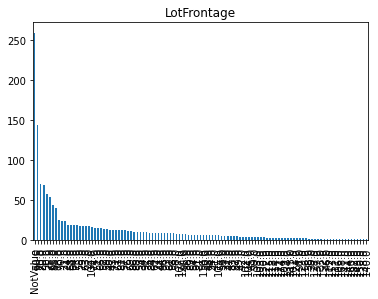

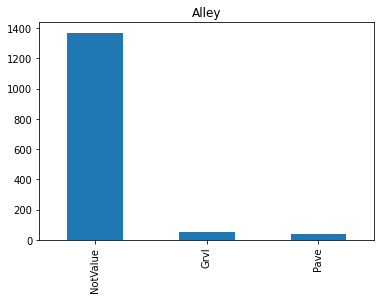

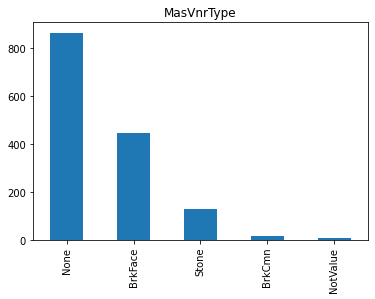

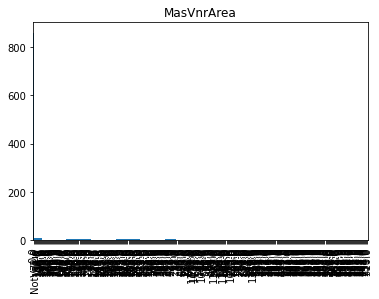

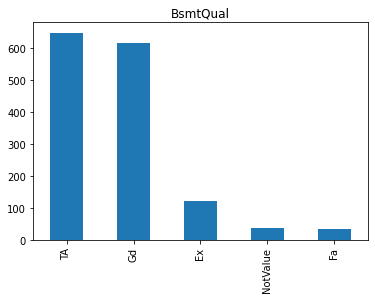

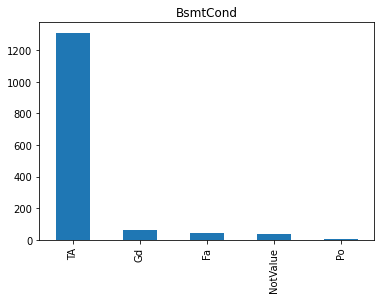

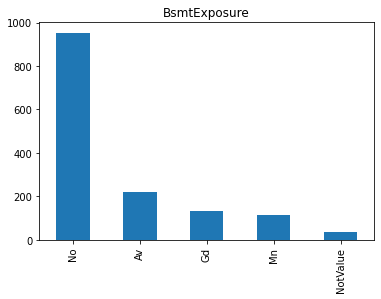

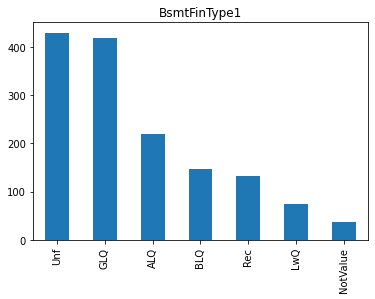

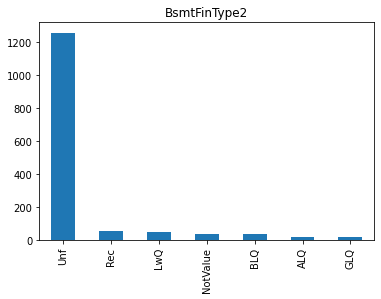

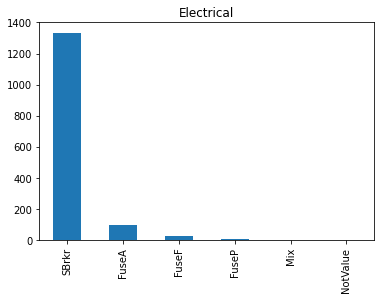

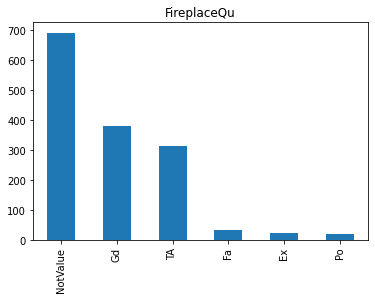

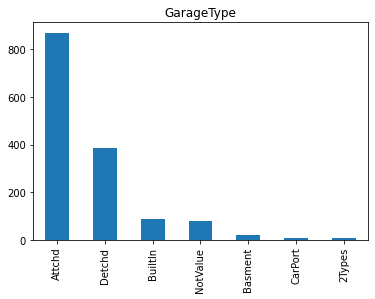

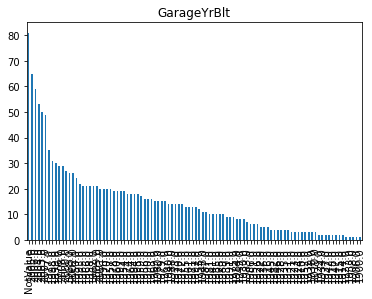

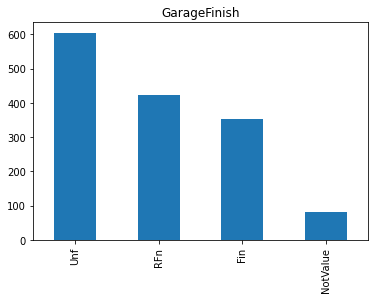

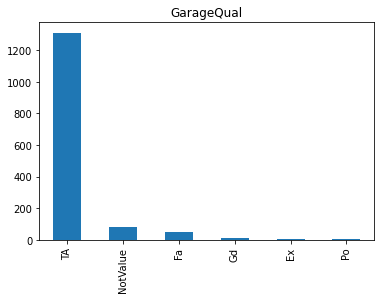

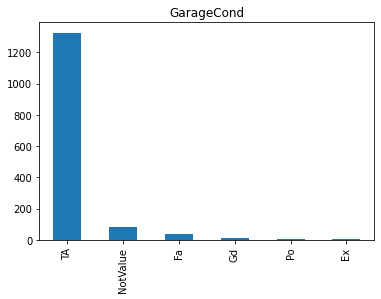

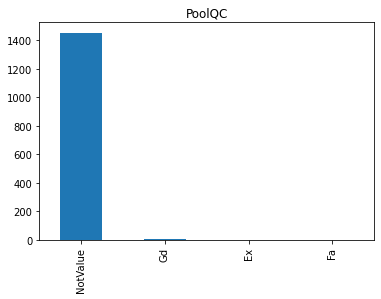

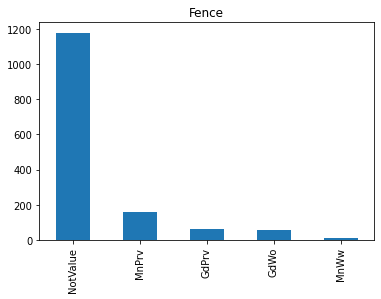

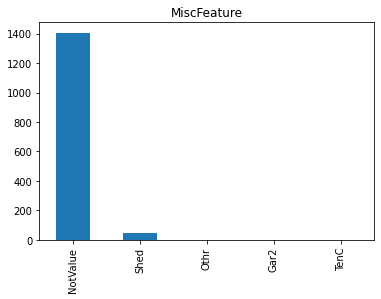

In [51]:
for feature in dataset.columns:
  if dataset[feature].isnull().any():
    print(feature, " has total of NaNs:\t\t", dataset[feature].isnull().sum(), "\tout of:\t", dataset.shape[0])
    fig, ax = plt.subplots()
    ax.set_title(feature)
    dataset[feature].replace(float('NaN'), 'NotValue').value_counts().plot(ax=ax, kind='bar')
    #print(feature, "\t",dataset[feature].isnull().sum(), "\t out of:\t", dataset[feature].shape[0])

## Encoding


### Integer Encoding

In [0]:
# Function to Integer Encode

def integer_encode(ds, toEncode):
  ds[toEncode[0]] = ds[toEncode[0]].map({'Grvl': 0, 'Pave': 1})
  ds[toEncode[1]] = ds[toEncode[1]].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 0})
  ds[toEncode[2]] = ds[toEncode[2]].map({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 0})
  ds[toEncode[3]] = ds[toEncode[3]].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
  ds[toEncode[4]] = ds[toEncode[4]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
  ds[toEncode[5]] = ds[toEncode[5]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
  ds[toEncode[6]] = ds[toEncode[6]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
  ds[toEncode[7]] = ds[toEncode[7]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
  ds[toEncode[8]] = ds[toEncode[8]].map({float('NaN'): 0, 'No': 1,'Mn': 2, 'Av': 3, 'Gd': 4})
  ds[toEncode[9]] = ds[toEncode[9]].map({float('NaN'): 0, 'Unf': 1,'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
  ds[toEncode[10]] = ds[toEncode[10]].map({float('NaN'): 0, 'Unf': 1,'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
  ds[toEncode[11]] = ds[toEncode[11]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
  ds[toEncode[12]] = ds[toEncode[12]].map({'N': 0, 'Y': 1})
  ds[toEncode[13]] = ds[toEncode[13]].map({float('NaN'): 1, 'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5})
  ds[toEncode[14]] = ds[toEncode[14]].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
  ds[toEncode[15]] = ds[toEncode[15]].map({float('NaN'): 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8})
  ds[toEncode[16]] = ds[toEncode[16]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
  ds[toEncode[17]] = ds[toEncode[17]].map({float('NaN'): 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
  ds[toEncode[18]] = ds[toEncode[18]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
  ds[toEncode[19]] = ds[toEncode[19]].map({float('NaN'): 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
  ds[toEncode[20]] = ds[toEncode[20]].map({'N': 0, 'P': 1,'Y': 2})
  ds[toEncode[21]] = ds[toEncode[21]].map({float('NaN'): 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
  ds[toEncode[22]] = ds[toEncode[22]].map({float('NaN'): 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})


In [52]:
toIntegerEncode = ['Street', 'LotShape', 'Utilities', 'LandSlope',
                   'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                   'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                   'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                   'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                   'PavedDrive', 'PoolQC', 'Fence'
                   ]

integer_encode(dataset, toIntegerEncode)

dataset[toIntegerEncode].isnull().any()

Street          False
LotShape        False
Utilities       False
LandSlope       False
ExterQual       False
ExterCond       False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
HeatingQC       False
CentralAir      False
Electrical      False
KitchenQual     False
Functional      False
FireplaceQu     False
GarageFinish    False
GarageQual      False
GarageCond      False
PavedDrive      False
PoolQC          False
Fence           False
dtype: bool

### One Hot Encoding

In [0]:
# Function to One Hot Encode

def one_hot_encoding(ds, toEncode):
  for feature in toOneHotEncode:
    dataset = pd.concat([dataset,pd.get_dummies(dataset[feature], prefix=feature)],axis=1)
  dataset = dataset.drop(columns=toOneHotEncode)


In [53]:
toOneHotEncode = ['MSZoning', 'Alley', 'LandContour', 'LotConfig',
                  'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                  'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                  'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'
                  ]


  


dataset = pd.concat([dataset, target], axis = 1)
dataset

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,...,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,1,0,0,0,7,5,2003,2003,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,1,856,854,0,1710,1,0,2,1,3,1,3,8,8,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,208500
1,20,80.0,9600,1,0,0,0,6,8,1976,1976,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1,1262,0,0,1262,0,1,2,0,3,1,2,6,8,1,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,181500
2,60,68.0,11250,1,2,0,0,7,5,2001,2002,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,1,920,866,0,1786,1,0,2,1,3,1,3,6,8,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,223500
3,70,60.0,9550,1,2,0,0,7,5,1915,1970,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,1,961,756,0,1717,1,0,1,0,3,1,3,7,8,1,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,140000
4,60,84.0,14260,1,2,0,0,8,5,2000,2000,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1,1,1145,1053,0,2198,1,0,2,1,4,1,3,9,8,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,85.0,13175,1,0,0,0,6,6,1978,1988,119.0,2,2,4,3,1,5,790,3,163,589,1542,2,1,1,2073,0,0,2073,1,0,2,0,3,1,2,7,7,2,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,210000
1456,70,66.0,9042,1,0,0,0,7,9,1941,2006,0.0,4,3,3,4,1,6,275,1,0,877,1152,4,1,1,1188,1152,0,2340,0,0,2,0,4,1,3,9,8,2,...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,266500
1457,20,68.0,9717,1,0,0,0,5,6,1950,1996,0.0,2,2,3,3,2,6,49,3,1029,0,1078,3,1,2,1078,0,0,1078,1,0,1,0,2,1,3,5,8,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,142125
1458,20,75.0,9937,1,0,0,0,5,6,1965,1965,0.0,3,2,3,3,1,4,830,2,290,136,1256,3,1,1,1256,0,0,1256,1,0,1,1,3,1,2,6,8,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,147500


## Finishing Details

In [54]:
for feature in dataset.columns:
  if dataset[feature].isnull().any():
    print(feature)

LotFrontage
MasVnrArea
GarageYrBlt


In [0]:
# Cleaning Test first
meanTraining = dataset.mean()

# Cleaning LotFrontage
dataset['LotFrontage'] = dataset['LotFrontage'].replace(float('NaN'), meanTraining['LotFrontage'])

# Cleaning MasVnrArea
dataset['MasVnrArea'] = dataset['MasVnrArea'].replace(float('NaN'), meanTraining['MasVnrArea'])

# Cleaning GarageYrBlt
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].replace(float('NaN'), meanTraining['GarageYrBlt'])

for feature in dataset.columns:
  if dataset[feature].isnull().any():
    print(feature)

## Correlation Heat Map

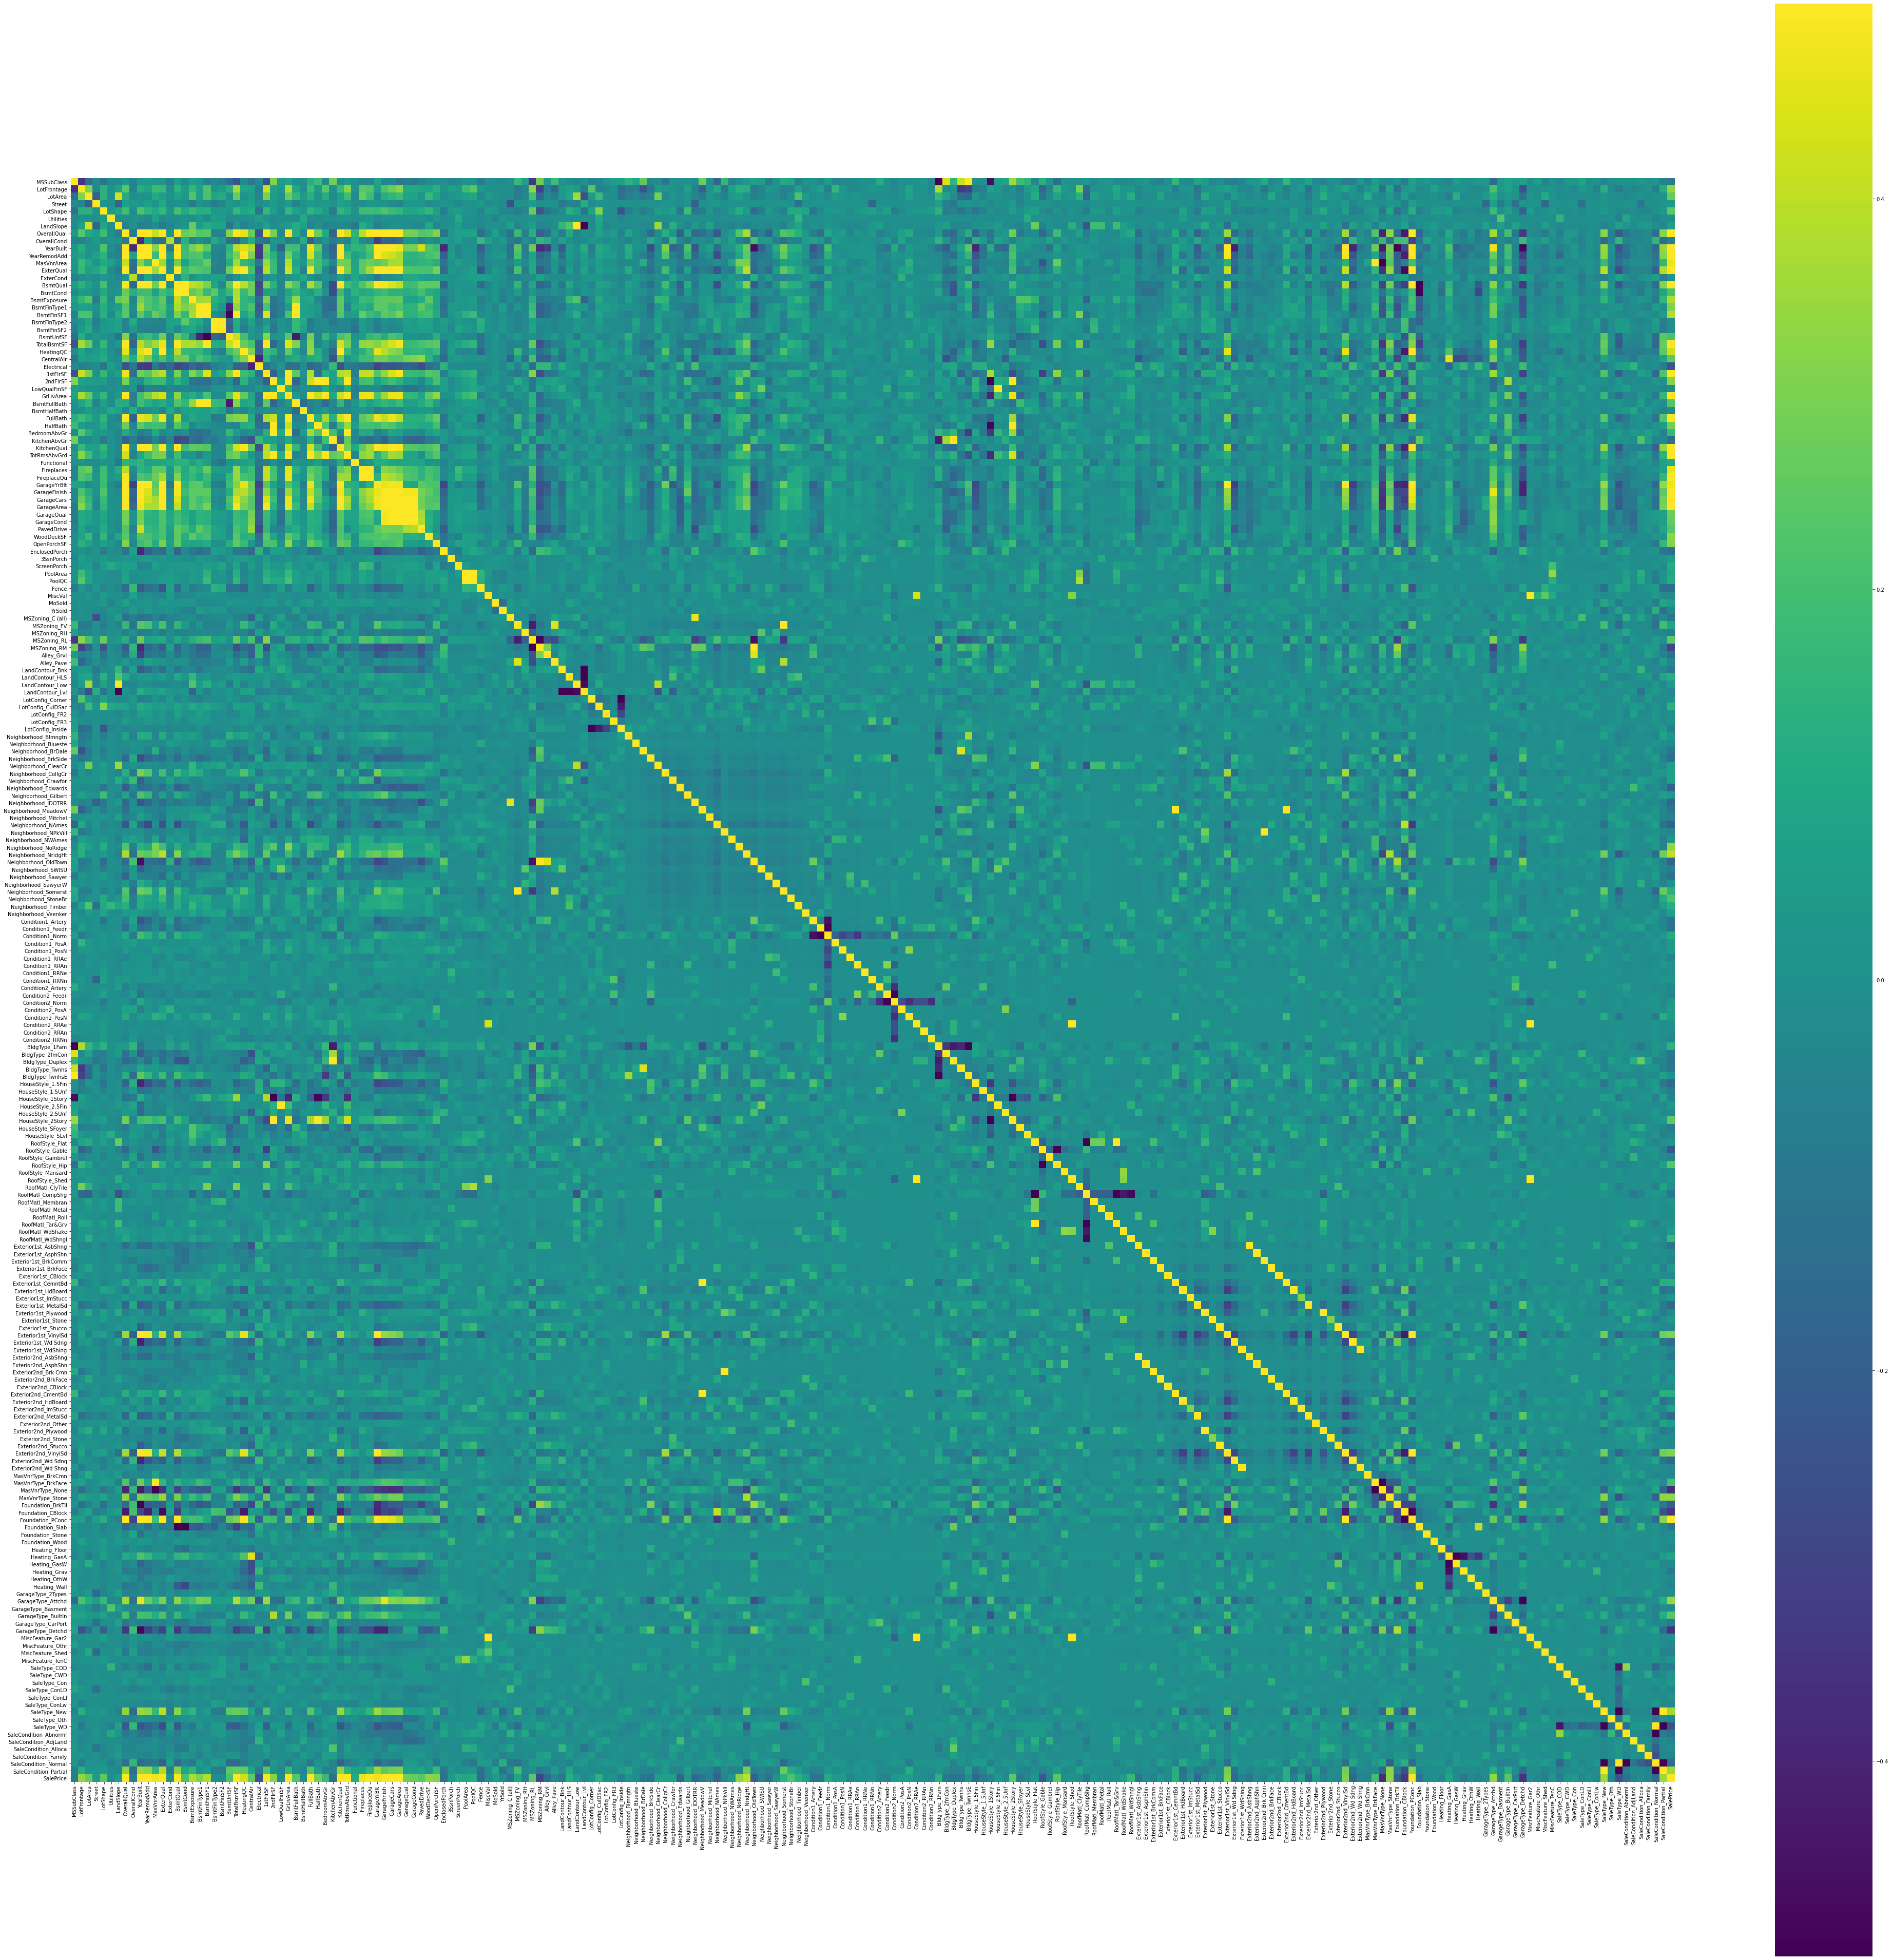

In [57]:
corr = dataset.corr()
plt.figure(figsize=(70, 70))
sns.heatmap(corr, vmin=-0.5, vmax=0.5, square = True, cmap='viridis')

## Extracting Important Features


In [58]:
corr['SalePrice']

MSSubClass              -0.084284
LotFrontage              0.334901
LotArea                  0.263843
Street                   0.041036
LotShape                 0.246798
                           ...   
SaleCondition_Alloca    -0.015525
SaleCondition_Family    -0.046480
SaleCondition_Normal    -0.153990
SaleCondition_Partial    0.352060
SalePrice                1.000000
Name: SalePrice, Length: 217, dtype: float64

In [59]:
importantFeatures = []
th = 0.35
thresholdP = th
thresholdN = -1 * th
features = dataset.columns
corIndex = 0
for corFeat in corr['SalePrice']:
  if corFeat >= thresholdP or corFeat <= thresholdN:
    importantFeatures.append(features[corIndex])
  corIndex += 1

importantFeatures

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'Neighborhood_NridgHt',
 'MasVnrType_None',
 'Foundation_PConc',
 'GarageType_Detchd',
 'SaleType_New',
 'SaleCondition_Partial',
 'SalePrice']

## Constructing new Dataset

In [61]:
datasetClean = dataset[importantFeatures]
datasetClean

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,Neighborhood_NridgHt,MasVnrType_None,Foundation_PConc,GarageType_Detchd,SaleType_New,SaleCondition_Partial,SalePrice
0,7,2003,2003,196.0,3,4,1,706,856,4,856,1710,2,3,8,0,0,2003.0,2,2,548,0,0,1,0,0,0,208500
1,6,1976,1976,0.0,2,4,4,978,1262,4,1262,1262,2,2,6,1,3,1976.0,2,2,460,0,1,0,0,0,0,181500
2,7,2001,2002,162.0,3,4,2,486,920,4,920,1786,2,3,6,1,3,2001.0,2,2,608,0,0,1,0,0,0,223500
3,7,1915,1970,0.0,2,3,1,216,756,3,961,1717,1,3,7,1,4,1998.0,1,3,642,0,1,0,1,0,0,140000
4,8,2000,2000,350.0,3,4,3,655,1145,4,1145,2198,2,3,9,1,3,2000.0,2,3,836,0,0,1,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1978,1988,119.0,2,4,1,790,1542,2,2073,2073,2,2,7,2,3,1978.0,1,2,500,0,0,0,0,0,0,210000
1456,7,1941,2006,0.0,4,3,1,275,1152,4,1188,2340,2,3,9,2,4,1941.0,2,1,252,0,1,0,0,0,0,266500
1457,5,1950,1996,0.0,2,3,2,49,1078,3,1078,1078,1,3,5,0,0,1950.0,1,1,240,0,1,0,0,0,0,142125
1458,5,1965,1965,0.0,3,3,1,830,1256,3,1256,1256,1,2,6,0,0,1965.0,3,1,276,0,1,0,0,0,0,147500


## Removing Anomalies

In [0]:
'''
dataset = pd.concat([dataset, target], axis = 1)
for col in dataset.columns:
  fig, ax = plt.subplots()
  ax.scatter(dataset[col], dataset['SalePrice'])
  plt.ylabel('SalePrice', fontsize=13)
  plt.xlabel(col, fontsize=13)
  plt.show()
'''

## Normalizing

In [65]:
notToNormalize = ['SalePrice']

def normalize_dataset(ds, exceptAtr):
  for col in ds.columns:
    if col not in exceptAtr:
      maxi = ds[col].max()
      mini = ds[col].min()
      ds[col] = (ds[col] - mini)/(maxi-mini)

normalize_dataset(datasetClean, notToNormalize)
datasetClean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,Neighborhood_NridgHt,MasVnrType_None,Foundation_PConc,GarageType_Detchd,SaleType_New,SaleCondition_Partial,SalePrice
0,0.666667,0.949275,0.883333,0.122500,0.666667,0.8,0.25,0.125089,0.140098,1.00,0.119780,0.259231,0.666667,0.666667,0.500000,0.000000,0.0,0.936364,0.666667,0.50,0.386460,0.0,0.0,1.0,0.0,0.0,0.0,208500
1,0.555556,0.753623,0.433333,0.000000,0.333333,0.8,1.00,0.173281,0.206547,1.00,0.212942,0.174830,0.666667,0.333333,0.333333,0.333333,0.6,0.690909,0.666667,0.50,0.324401,0.0,1.0,0.0,0.0,0.0,0.0,181500
2,0.666667,0.934783,0.866667,0.101250,0.666667,0.8,0.50,0.086109,0.150573,1.00,0.134465,0.273549,0.666667,0.666667,0.333333,0.333333,0.6,0.918182,0.666667,0.50,0.428773,0.0,0.0,1.0,0.0,0.0,0.0,223500
3,0.666667,0.311594,0.333333,0.000000,0.333333,0.6,0.25,0.038271,0.123732,0.75,0.143873,0.260550,0.333333,0.666667,0.416667,0.333333,0.8,0.890909,0.333333,0.75,0.452750,0.0,1.0,0.0,1.0,0.0,0.0,140000
4,0.777778,0.927536,0.833333,0.218750,0.666667,0.8,0.75,0.116052,0.187398,1.00,0.186095,0.351168,0.666667,0.666667,0.583333,0.333333,0.6,0.909091,0.666667,0.75,0.589563,0.0,0.0,1.0,0.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.555556,0.768116,0.633333,0.074375,0.333333,0.8,0.25,0.139972,0.252373,0.50,0.399036,0.327619,0.666667,0.333333,0.416667,0.666667,0.6,0.709091,0.333333,0.50,0.352609,0.0,0.0,0.0,0.0,0.0,0.0,210000
1456,0.666667,0.500000,0.933333,0.000000,1.000000,0.6,0.25,0.048724,0.188543,1.00,0.195961,0.377920,0.666667,0.666667,0.583333,0.666667,0.8,0.372727,0.666667,0.25,0.177715,0.0,1.0,0.0,0.0,0.0,0.0,266500
1457,0.444444,0.565217,0.766667,0.000000,0.333333,0.6,0.50,0.008682,0.176432,0.75,0.170721,0.140166,0.333333,0.666667,0.250000,0.000000,0.0,0.454545,0.333333,0.25,0.169252,0.0,1.0,0.0,0.0,0.0,0.0,142125
1458,0.444444,0.673913,0.250000,0.000000,0.666667,0.6,0.25,0.147059,0.205565,0.75,0.211565,0.173700,0.333333,0.333333,0.333333,0.000000,0.0,0.590909,1.000000,0.25,0.194640,0.0,1.0,0.0,0.0,0.0,0.0,147500


## Partitioning
Se utilizará como criterio: 80% para entrenamiento y 20% para Test 

In [0]:
# Training
dataTrain = datasetClean.sample(frac = 0.8)
trainPredictions = dataTrain["SalePrice"]
dataTrain = dataTrain.drop(columns=['SalePrice'])

# Test
dataTest = datasetClean.drop(dataTrain.index)
testPredictions = dataTest["SalePrice"]
dataTest = dataTest.drop(columns=['SalePrice'])

# Modelo

## Macro Variables
Variables macro que son utilizados como parámetros en el entrenamiento

In [0]:
epochs = 600
inputShape = dataTrain.shape[1]

## Useful Functions

## Callback

In [0]:
# checkpoint
model_path = "/content/drive/My Drive/IO/Version1/Project/Normalized1/"
filepath = model_path + "saved_model.pb"
checkpoint_callback = ModelCheckpoint(filepath, monitor='mae', verbose=1, save_best_only=True, mode='min',save_freq='epoch')

# callbacks
callbacks_list = [checkpoint_callback]

### Model Defintion and Training

In [71]:
# Training
model = Sequential([
      Dense(512, kernel_initializer='normal', activation='relu', input_shape=(inputShape,)),
      Dense(256, kernel_initializer='normal', activation='relu'),
      Dense(128, kernel_initializer='normal', activation='relu'),
      Dense(128, kernel_initializer='normal', activation='linear'),
      Dense(1)
  ])

model.compile(loss='mae', optimizer='adam', metrics=['mae'])


model.fit(dataTrain,
          trainPredictions,
          epochs=epochs,
          #validation_data=validation_split,
          batch_size = 64 ,
          validation_split=0.2,
          callbacks=callbacks_list
        )
# Evaluation
#evaluation = evaluate_model(model, dataTest, testPredictions)
#evaluation

Epoch 1/600
13/15 [=========================>....] - ETA: 0s - loss: 179791.4688 - mae: 179791.4688
Epoch 00001: mae improved from inf to 178177.67188, saving model to /content/drive/My Drive/IO/Version1/Project/Normalized1/saved_model.pb
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/IO/Version1/Project/Normalized1/saved_model.pb/assets
15/15 [==============================] - 1s 62ms/step - loss: 177975.9375 - mae: 178177.6719 - val_loss: 187523.6875 - val_mae: 187434.9688
Epoch 2/600
12/15 [=======================>......] - ETA: 0s - loss: 176670.8281 - mae: 176670.8281
Epoch 00002: mae improved from 178177.67188 to 177988.15625, saving model to /content/drive/My Drive/IO/Version1/Project/Normalized1/saved_model.pb
INFO:tensorflow:Assets written to: /content/drive/My Drive/IO/Version1/Project/Normalized1/saved_model.pb/assets
15/15 [==============================] - 1s 47ms/step - loss: 1778

## Extract Best Model

In [72]:
model = tf.keras.models.load_model(filepath)

model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f63a3a267f0>>

## Evaluate Model

In [73]:
model.evaluate(dataTest, testPredictions)

10/10 [==============================] - 0s 2ms/step - loss: 23680.0117 - mean_absolute_error: 23800.1270


[23680.01171875, 23800.126953125]

# Kaggle Predictions

In [78]:
importantFeatures

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'Neighborhood_NridgHt',
 'MasVnrType_None',
 'Foundation_PConc',
 'GarageType_Detchd',
 'SaleType_New',
 'SaleCondition_Partial',
 'SalePrice',
 'Id',
 'Id',
 'Id']

In [77]:
# https://raw.githubusercontent.com/corderobot/Kaggle_HousePrices/master/CSVs/test.csv
test = pd.read_csv('https://raw.githubusercontent.com/corderobot/Kaggle_HousePrices/master/CSVs/test.csv')
importantFeatures.append('Id')
test = test[importantFeatures]
Ids = test['Id']
test = test.drop(columns=['Id'])
test       

KeyError: ignored

In [0]:
# Cleaning Test first
meanTest = test.mean()

# Cleaning MasVnrArea
test['MasVnrArea'] = test['MasVnrArea'].replace(float('NaN'), meanTest['MasVnrArea'])

# Cleaning TotalBsmtSF
test['TotalBsmtSF'] = test['TotalBsmtSF'].replace(float('NaN'), meanTest['TotalBsmtSF'])

# Cleaning GarageYrBlt
test['GarageYrBlt'] = test['GarageYrBlt'].replace(float('NaN'), meanTest['GarageYrBlt'])

# Cleaning GarageCars
test['GarageCars'] = test['GarageCars'].replace(float('NaN'), meanTest['GarageCars'])

# Cleaning GarageArea
test['GarageArea'] = test['GarageArea'].replace(float('NaN'), meanTest['GarageArea'])

In [0]:
test.isnull().any()

# Normalizing

normalize_dataset(test, toNormalize)
test

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,0.444444,0.625954,0.183333,0.000000,0.173111,0.104309,0.104309,1,5,0,0.211538,1.0,0.490591
1,0.555556,0.603053,0.133333,0.083721,0.260844,0.196672,0.196672,1,6,0,0.201923,1.0,0.209677
2,0.444444,0.900763,0.800000,0.000000,0.182139,0.111135,0.260666,2,6,1,0.326923,2.0,0.323925
3,0.555556,0.908397,0.800000,0.015504,0.181747,0.110708,0.255333,2,7,1,0.330128,2.0,0.315860
4,0.777778,0.862595,0.700000,0.000000,0.251227,0.186220,0.186220,2,5,0,0.310897,2.0,0.340054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.333333,0.694656,0.333333,0.000000,0.107164,0.029650,0.146118,1,5,0,0.265132,0.0,0.000000
1455,0.333333,0.694656,0.333333,0.000000,0.107164,0.029650,0.146118,1,6,0,0.240385,1.0,0.192204
1456,0.444444,0.618321,0.766667,0.000000,0.240236,0.174275,0.174275,1,7,1,0.208333,2.0,0.387097
1457,0.444444,0.862595,0.700000,0.000000,0.178999,0.120094,0.120094,1,6,0,0.265132,0.0,0.000000


## Predicciones del Modelo

In [0]:
predictions = model.predict(test)

## Submission

In [0]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':Ids,'SalePrice':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')
  return my_submission

make_submission(predictions[:,0],'submission_NN')

A submission file has been made


,Id,SalePrice
0,1461,127882.625000
1,1462,150919.890625
2,1463,199221.609375
3,1464,219709.375000
4,1465,230450.375000
...,...,...
1454,2915,106412.312500
1455,2916,114850.117188
1456,2917,175024.593750
1457,2918,140584.437500
